In [264]:
import pandas as pd
import sys
import os
import numpy as np

#sys.path.insert(0, '/home/alexander/PycharmProjects/Shryne_project/Shryne/mining')
sys.path.insert(0, '../Shryne_project/Shryne/mining')


default = pd.read_csv("../data/SELECT_ALL_FROM_all_messages_metadata.csv")

In [265]:
df = default[default["relationship"]=="Ex"]
df["Date"] = pd.to_datetime(df["sent_at"],format='%Y-%m-%d').dt.date

/Users/Camila/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [272]:
df.head(20000)

,Unnamed: 0,user_id,contact_id,relationship,channel,sent_at,Date
0,0,10,35,Ex,gmail,2010-10-11 02:22:16,2010-10-11
1,1,10,35,Ex,gmail,2010-10-13 05:25:54,2010-10-13
2,2,10,35,Ex,gmail,2010-10-15 05:02:18,2010-10-15
3,3,10,35,Ex,gmail,2010-10-16 21:22:33,2010-10-16
4,4,10,35,Ex,gmail,2010-10-21 03:36:04,2010-10-21
5,5,10,35,Ex,gmail,2010-12-03 22:09:42,2010-12-03
6,6,10,35,Ex,gmail,2011-02-15 18:48:08,2011-02-15
7,7,10,35,Ex,gmail,2011-02-18 07:35:43,2011-02-18
8,8,10,35,Ex,gmail,2011-03-14 16:57:14,2011-03-14
9,9,10,35,Ex,gmail,2011-03-14 23:46:56,2011-03-14


In [267]:
group = df.groupby(["user_id","contact_id"])

In [268]:
new = group['Date'].agg(np.max) - group['Date'].agg(np.min)
print new

user_id  contact_id
10       35           1218 days
         16787         255 days
83       98            492 days
         99            105 days
147      219             1 days
188      320             0 days
1888     3201          282 days
1892     3211           60 days
1897     11293          91 days
1911     3247         3207 days
1971     25981         588 days
         25988          99 days
1982     3374         1138 days
2043     4443         2219 days
2046     3502         1685 days
         3503         2074 days
2128     3661          420 days
         32135         320 days
2139     3683          460 days
2198     3797          627 days
2238     3866           67 days
2254     3895          846 days
2264     5486          388 days
2360     4101          443 days
2496     4382           61 days
2521     4432            0 days
2569     4516           86 days
2646     4666           88 days
2702     4790         1203 days
2748     4883          466 days
                    

In [271]:
a=np.bincount(df['contact_id'].values)[df.contact_id.unique()]

list_unique = df.contact_id.unique()
list_days =[]

for i in list_unique:
    df_one = df[df["contact_id"]==i]

    number_of_days = max(df_one["Date"]) - min(df_one["Date"])
    list_days.append(float(number_of_days.days))

print a
print list_days
messages_per_day = a/list_days

[   23   225    49   340   184     2   131     3   121   462    28    90
    25  1455   169  1719 20956  9474    16   581     2  3027 12477   689
    18     5    12    47    45   134   190  1530     7     1     5  6100
  3165    96   718   479     1 14208  4193    77   105   224   108   274
    33    87    33 10837    23  4504    44    61 28808    26   415   673
   150   107     6  1946     1  1022    72  2022   158   964  2911  1729
  3442  2246    30   190   203     2  1252   563    25   761   104   939
 32833  2359   152  1409     1    81    86 10615  7607   780    26   112
     2   450  1415  1791   118    31  1559   859    13    36   136   893
   247     1   129     1  1862  1522     1    38  5051  2650    31    76
    34   139    69    99    67  4703  8937 13488  6232   161     1     5
    12    17     5     1  1317    15     5   128    12  1449    16    17
 36891   354    17    58   243  1132    15    33   393   474   106   990
  6968   136  1944   798   100    80  6149  3754   

<function matplotlib.pyplot.show>

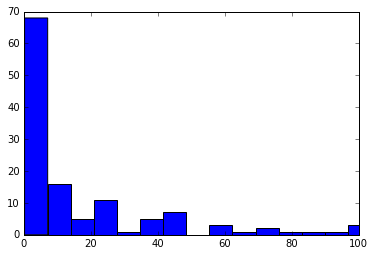

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline

messages_per_day = np.array(messages_per_day)
inf_values = np.isinf(messages_per_day)
cleaned_messages = messages_per_day[~inf_values]

plt.hist(cleaned_messages, 800)
plt.xlim([0,100])
plt.show

In [275]:
df.set_index('Date', drop=False)
df['Date'].value_counts().resample('D').sum().tolist()
df['Date'].value_counts().resample('D', how='sum').index.tolist()
df['Date'].value_counts().resample('D').sum().index.tolist()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex